# Burak Nur Erdem
# IE360 Homework 4
## Forecasting Turkey's Electricity Consumption

## Table of Contents
#### 1. Introduction 
#### 2. Data Manipulation and Interpreting
#### 3. Questioning Stationarity and Further Data Manipulation
#### 4. Building Models, Forecasting and Accuracy
#### 5. Conclusion

# 1. Introduction

In this homework, I am expected to stationarize the daily electricity consumption of Turkey between 1 January 2017 and 8 January 2021, then to forecast the daily consumption between 9 January 2021 and 23 January 2021 using autoregressive and moving average models. The process required moderate data manupulation and some assumptions which are mentioned along the way. The data is provided by the Energy Exchange Istanbul Transparency Platform.

# 2. Data Manipulation and Interpreting

First of all, the provided data is hourly. I summed up the hourly values into daily basis. Necessary adjustments such as changing value types, changing column names are made. Then, I plotted the daily consumption values over time to roughly interpret what the data looks like and to see the structure of outliers. As we have discussed in the class, there are downward spikes in the times of religious holidays. I could have say they were below the 5% quantile; however, as it can be seen on the plot the Covid-19 period also lies below the line. So, I manually changed the religious holidays' values to values of the same weekday's before the holidays, counting the connected weekends where the consumption values were below expectations. This baseline approach is not very problematic, because usually the electricity consumption values don't increase or decrease drastically in short times. Basically, the assumption is that if it weren't for a religious holiday, the values wouldn't be very different from what they were in the week before.

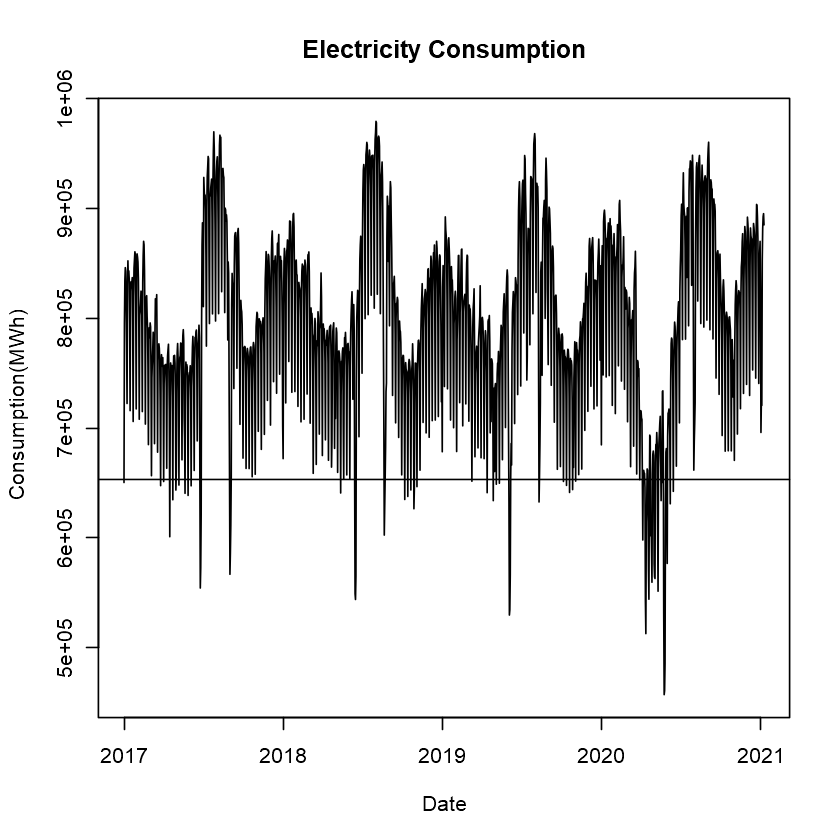

In [1]:
suppressWarnings(suppressMessages(library(data.table)))
suppressWarnings(suppressMessages(library(forecast)))

consump = fread("RealTimeConsumption.csv")
colnames(consump) = c("Date", "Hour", "Consumption")

consump[,Date:=as.Date(consump[,Date], format = "%d.%m.%Y")]
consump[,Consumption:=gsub(',','',Consumption)]
consump[,Consumption:=as.numeric(consump[,Consumption])]

dailycons = consump[,list(DailyConsumption = sum(Consumption)), by = list(Date)]





plot(x=dailycons$Date,y=dailycons$DailyConsumption, type="l",
     ylab="Consumption(MWh)", xlab="Date", main = "Electricity Consumption")
abline(h = quantile(x = dailycons$DailyConsumption, probs = 0.05))

In [2]:
# 2017 Ramazan Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2017-06-16") & Date<=as.Date("2017-06-30") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2017-06-24") , DailyConsumption:=dailycons[Date == as.Date("2017-06-17") , DailyConsumption]]
dailycons[Date == as.Date("2017-06-25") , DailyConsumption:=dailycons[Date == as.Date("2017-06-18") , DailyConsumption]]
dailycons[Date == as.Date("2017-06-26") , DailyConsumption:=dailycons[Date == as.Date("2017-06-19") , DailyConsumption]]
dailycons[Date == as.Date("2017-06-27") , DailyConsumption:=dailycons[Date == as.Date("2017-06-20") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2017-06-16") & Date<=as.Date("2017-06-30") ,DailyConsumption], type="l")


# 2017 Kurban Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2017-08-24") & Date<=as.Date("2017-09-15") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2017-08-31") , DailyConsumption:=dailycons[Date == as.Date("2017-08-24") , DailyConsumption]]
dailycons[Date == as.Date("2017-09-01") , DailyConsumption:=dailycons[Date == as.Date("2017-08-25") , DailyConsumption]]
dailycons[Date == as.Date("2017-09-02") , DailyConsumption:=dailycons[Date == as.Date("2017-08-26") , DailyConsumption]]
dailycons[Date == as.Date("2017-09-03") , DailyConsumption:=dailycons[Date == as.Date("2017-08-27") , DailyConsumption]]
dailycons[Date == as.Date("2017-09-04") , DailyConsumption:=dailycons[Date == as.Date("2017-08-28") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2017-08-24") & Date<=as.Date("2017-09-15") ,DailyConsumption], type="l")


# 2018 Ramazan Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2018-06-08") & Date<=as.Date("2018-06-22") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2018-06-14") , DailyConsumption:=dailycons[Date == as.Date("2018-06-07") , DailyConsumption]]
dailycons[Date == as.Date("2018-06-15") , DailyConsumption:=dailycons[Date == as.Date("2018-06-08") , DailyConsumption]]
dailycons[Date == as.Date("2018-06-16") , DailyConsumption:=dailycons[Date == as.Date("2018-06-09") , DailyConsumption]]
dailycons[Date == as.Date("2018-06-17") , DailyConsumption:=dailycons[Date == as.Date("2018-06-10") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2018-06-08") & Date<=as.Date("2018-06-22") ,DailyConsumption], type="l")


# 2018 Kurban Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2018-08-01") & Date<=as.Date("2018-08-30") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2018-08-18") , DailyConsumption:=dailycons[Date == as.Date("2018-08-11") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-19") , DailyConsumption:=dailycons[Date == as.Date("2018-08-12") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-20") , DailyConsumption:=dailycons[Date == as.Date("2018-08-13") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-21") , DailyConsumption:=dailycons[Date == as.Date("2018-08-14") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-22") , DailyConsumption:=dailycons[Date == as.Date("2018-08-15") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-23") , DailyConsumption:=dailycons[Date == as.Date("2018-08-16") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-24") , DailyConsumption:=dailycons[Date == as.Date("2018-08-17") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-25") , DailyConsumption:=dailycons[Date == as.Date("2018-08-11") , DailyConsumption]]
dailycons[Date == as.Date("2018-08-26") , DailyConsumption:=dailycons[Date == as.Date("2018-08-12") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2018-08-01") & Date<=as.Date("2018-08-30") ,DailyConsumption], type="l")


# 2019 Ramazan Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2019-05-18") & Date<=as.Date("2019-06-15") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2019-06-01") , DailyConsumption:=dailycons[Date == as.Date("2019-05-25") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-02") , DailyConsumption:=dailycons[Date == as.Date("2019-05-26") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-03") , DailyConsumption:=dailycons[Date == as.Date("2019-05-27") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-04") , DailyConsumption:=dailycons[Date == as.Date("2019-05-28") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-05") , DailyConsumption:=dailycons[Date == as.Date("2019-05-29") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-06") , DailyConsumption:=dailycons[Date == as.Date("2019-05-30") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-07") , DailyConsumption:=dailycons[Date == as.Date("2019-05-31") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-08") , DailyConsumption:=dailycons[Date == as.Date("2019-05-25") , DailyConsumption]]
dailycons[Date == as.Date("2019-06-09") , DailyConsumption:=dailycons[Date == as.Date("2019-05-26") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2019-05-18") & Date<=as.Date("2019-06-15") ,DailyConsumption], type="l")


# 2019 Kurban Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2019-08-03") & Date<=as.Date("2019-08-31") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2019-08-10") , DailyConsumption:=dailycons[Date == as.Date("2019-08-03") , DailyConsumption]]
dailycons[Date == as.Date("2019-08-11") , DailyConsumption:=dailycons[Date == as.Date("2019-08-04") , DailyConsumption]]
dailycons[Date == as.Date("2019-08-12") , DailyConsumption:=dailycons[Date == as.Date("2019-08-05") , DailyConsumption]]
dailycons[Date == as.Date("2019-08-13") , DailyConsumption:=dailycons[Date == as.Date("2019-08-06") , DailyConsumption]]
dailycons[Date == as.Date("2019-08-14") , DailyConsumption:=dailycons[Date == as.Date("2019-08-07") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2019-08-03") & Date<=as.Date("2019-08-31") ,DailyConsumption], type="l")


# 2020 Ramazan Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2020-05-15") & Date<=as.Date("2020-05-29") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2020-05-23") , DailyConsumption:=dailycons[Date == as.Date("2020-05-16") , DailyConsumption]]
dailycons[Date == as.Date("2020-05-24") , DailyConsumption:=dailycons[Date == as.Date("2020-05-17") , DailyConsumption]]
dailycons[Date == as.Date("2020-05-25") , DailyConsumption:=dailycons[Date == as.Date("2020-05-18") , DailyConsumption]]
dailycons[Date == as.Date("2020-05-26") , DailyConsumption:=dailycons[Date == as.Date("2020-05-19") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2020-05-15") & Date<=as.Date("2020-05-29") ,DailyConsumption], type="l")


# 2020 Kurban Bayramı Value Correction
#plot(dailycons[Date>=as.Date("2020-07-23") & Date<=as.Date("2020-08-10") ,DailyConsumption], type="l")
dailycons[Date == as.Date("2020-07-30") , DailyConsumption:=dailycons[Date == as.Date("2020-07-23") , DailyConsumption]]
dailycons[Date == as.Date("2020-07-31") , DailyConsumption:=dailycons[Date == as.Date("2020-07-24") , DailyConsumption]]
dailycons[Date == as.Date("2020-08-01") , DailyConsumption:=dailycons[Date == as.Date("2020-07-25") , DailyConsumption]]
dailycons[Date == as.Date("2020-08-02") , DailyConsumption:=dailycons[Date == as.Date("2020-07-26") , DailyConsumption]]
dailycons[Date == as.Date("2020-08-03") , DailyConsumption:=dailycons[Date == as.Date("2020-07-27") , DailyConsumption]]
#plot(dailycons[Date>=as.Date("2020-07-23") & Date<=as.Date("2020-08-10") ,DailyConsumption], type="l")

<br>
As it can be seen clearly in the plot below, correcting the values of the religious holidays made the graph much smoother. We can say that we are free of drastically different outliers. However, the data still needs some adjustments to say that it is stationary.
<br><br>

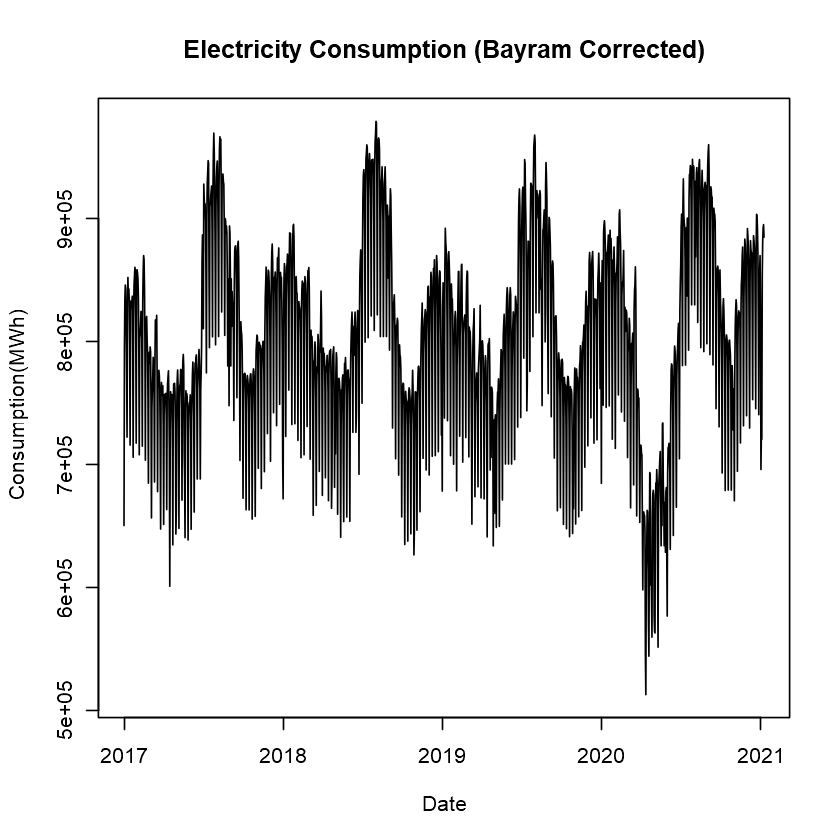

In [3]:
plot(x=dailycons$Date,y=dailycons$DailyConsumption, type="l",
     ylab="Consumption(MWh)", xlab="Date", main = "Electricity Consumption (Bayram Corrected)")

# 3. Questioning Stationarity and Further Data Manipulation
<br>
KPSS unit root test is used to determine if a series requires differencing. Below, I applied the test to daily consumption series. Suprisingly, the value of the test statistic is lower than the critical levels. However, I still believe that differencing the series with 7 lags will make the series more stationary. so I took the differenced series and plotted it. I also tested KPSS test on the differenced series which didnt yield any significant results.
<br><br>

In [4]:
suppressWarnings(suppressMessages(library(urca)))

dailycons$DailyConsumption %>% ur.kpss() %>% summary()
diff(dailycons$DailyConsumption, lag = 7) %>% ur.kpss() %>% summary()



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.1712 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.03 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


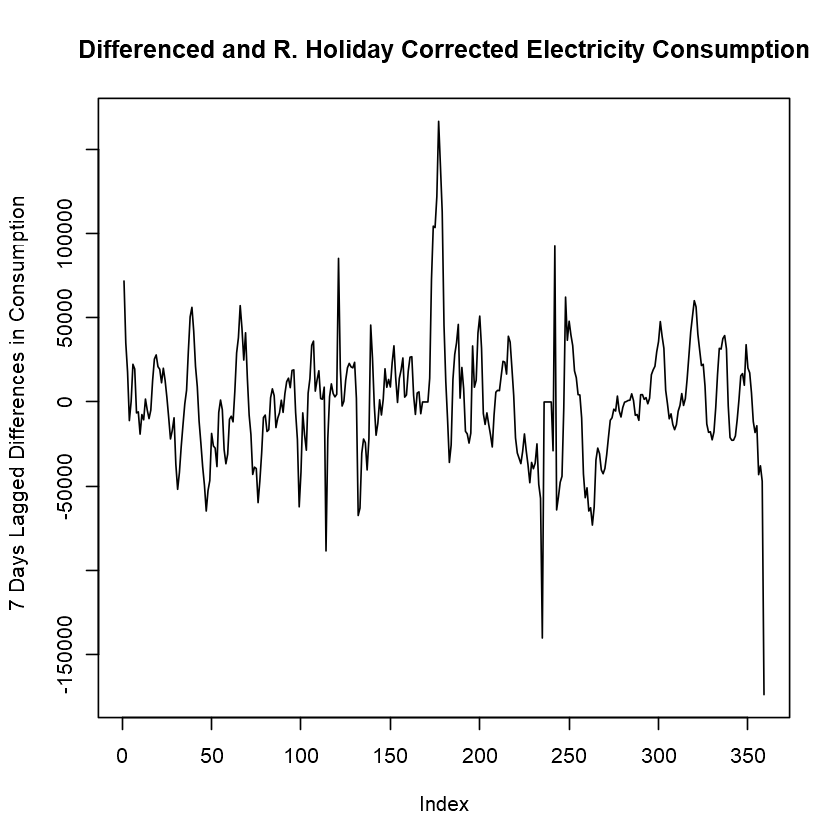

In [5]:
plot(diff(dailycons[Date<="2018-01-01",DailyConsumption], lag = 7), type="l", ylab="7 Days Lagged Differences in Consumption",
     main = "Differenced and R. Holiday Corrected Electricity Consumption")

<br>
The differenced series look more stationary. It moves around zero which is a good sign. However, down below, I tested the series with Box-Ljung test to see if it is stationary, but the p-value came up significantly low. I didn't know what could be done at this point. My thought was to move on to forecasting and if the values came up absurd I would come back to here and think about what could be done. However, as you will see, it didn't came up to that point.
<br><br>

In [6]:
Box.test(diff(dailycons$DailyConsumption, lag = 7), type="Ljung-Box", lag=7)


	Box-Ljung test

data:  diff(dailycons$DailyConsumption, lag = 7)
X-squared = 1452.2, df = 7, p-value < 2.2e-16


# 4. Building Models, Forecasting and Accuracy
<br>
Below, I have built three different models. The first is an autoregressive model with parameter 1, the second is a moving average with parameter also 1, lastly I utilized the auto.arima function to tweak the parameters and to find a suitable ARIMA model. Then, I predicted the wanted 15-days period using all three models separately and put transformed the difference values back into original values and put them all into the same data table.
<br><br>

In [7]:
forecastPeriod = seq.Date(from=as.Date("2021-01-09"), to=as.Date("2021-01-23"), by="day")
forecastPeriod = data.table(Date=forecastPeriod)

modelAR = arima(diff(dailycons$DailyConsumption,lag=7), order = c(1,0,0))
forecastAR = predict(modelAR, n.ahead = 15)$pred
forecastAR = as.numeric(forecastAR)
forecastPeriod[,ResultAR:=0]

forecastPeriod[Date==as.Date("2021-01-09"), ResultAR:=dailycons[Date==as.Date("2021-01-02"), DailyConsumption] + forecastAR[1]]
forecastPeriod[Date==as.Date("2021-01-10"), ResultAR:=dailycons[Date==as.Date("2021-01-03"), DailyConsumption] + forecastAR[2]]
forecastPeriod[Date==as.Date("2021-01-11"), ResultAR:=dailycons[Date==as.Date("2021-01-04"), DailyConsumption] + forecastAR[3]]
forecastPeriod[Date==as.Date("2021-01-12"), ResultAR:=dailycons[Date==as.Date("2021-01-05"), DailyConsumption] + forecastAR[4]]
forecastPeriod[Date==as.Date("2021-01-13"), ResultAR:=dailycons[Date==as.Date("2021-01-06"), DailyConsumption] + forecastAR[5]]
forecastPeriod[Date==as.Date("2021-01-14"), ResultAR:=dailycons[Date==as.Date("2021-01-07"), DailyConsumption] + forecastAR[6]]
forecastPeriod[Date==as.Date("2021-01-15"), ResultAR:=dailycons[Date==as.Date("2021-01-08"), DailyConsumption] + forecastAR[7]]
forecastPeriod[Date==as.Date("2021-01-16"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-09"), ResultAR] + forecastAR[8]]
forecastPeriod[Date==as.Date("2021-01-17"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-10"), ResultAR] + forecastAR[9]]
forecastPeriod[Date==as.Date("2021-01-18"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-11"), ResultAR] + forecastAR[10]]
forecastPeriod[Date==as.Date("2021-01-19"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-12"), ResultAR] + forecastAR[11]]
forecastPeriod[Date==as.Date("2021-01-20"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-13"), ResultAR] + forecastAR[12]]
forecastPeriod[Date==as.Date("2021-01-21"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-14"), ResultAR] + forecastAR[13]]
forecastPeriod[Date==as.Date("2021-01-22"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-15"), ResultAR] + forecastAR[14]]
forecastPeriod[Date==as.Date("2021-01-23"), ResultAR:=forecastPeriod[Date==as.Date("2021-01-16"), ResultAR] + forecastAR[15]]

modelMA = arima(diff(dailycons$DailyConsumption,lag=7), order = c(0,0,1))
forecastMA = predict(modelMA, n.ahead = 15)$pred
forecastMA = as.numeric(forecastMA)
forecastPeriod[,ResultMA:=0]

forecastPeriod[Date==as.Date("2021-01-09"), ResultMA:=dailycons[Date==as.Date("2021-01-02"), DailyConsumption] + forecastMA[1]]
forecastPeriod[Date==as.Date("2021-01-10"), ResultMA:=dailycons[Date==as.Date("2021-01-03"), DailyConsumption] + forecastMA[2]]
forecastPeriod[Date==as.Date("2021-01-11"), ResultMA:=dailycons[Date==as.Date("2021-01-04"), DailyConsumption] + forecastMA[3]]
forecastPeriod[Date==as.Date("2021-01-12"), ResultMA:=dailycons[Date==as.Date("2021-01-05"), DailyConsumption] + forecastMA[4]]
forecastPeriod[Date==as.Date("2021-01-13"), ResultMA:=dailycons[Date==as.Date("2021-01-06"), DailyConsumption] + forecastMA[5]]
forecastPeriod[Date==as.Date("2021-01-14"), ResultMA:=dailycons[Date==as.Date("2021-01-07"), DailyConsumption] + forecastMA[6]]
forecastPeriod[Date==as.Date("2021-01-15"), ResultMA:=dailycons[Date==as.Date("2021-01-08"), DailyConsumption] + forecastMA[7]]
forecastPeriod[Date==as.Date("2021-01-16"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-09"), ResultMA] + forecastMA[8]]
forecastPeriod[Date==as.Date("2021-01-17"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-10"), ResultMA] + forecastMA[9]]
forecastPeriod[Date==as.Date("2021-01-18"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-11"), ResultMA] + forecastMA[10]]
forecastPeriod[Date==as.Date("2021-01-19"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-12"), ResultMA] + forecastMA[11]]
forecastPeriod[Date==as.Date("2021-01-20"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-13"), ResultMA] + forecastMA[12]]
forecastPeriod[Date==as.Date("2021-01-21"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-14"), ResultMA] + forecastMA[13]]
forecastPeriod[Date==as.Date("2021-01-22"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-15"), ResultMA] + forecastMA[14]]
forecastPeriod[Date==as.Date("2021-01-23"), ResultMA:=forecastPeriod[Date==as.Date("2021-01-16"), ResultMA] + forecastMA[15]]


modelARIMA = auto.arima(diff(dailycons$DailyConsumption))
forecastARIMA = predict(modelARIMA, n.ahead = 15)$pred
forecastARIMA = as.numeric(forecastARIMA)
forecastPeriod[,ResultARIMA:=0]

forecastPeriod[Date==as.Date("2021-01-09"), ResultARIMA:=dailycons[Date==as.Date("2021-01-02"), DailyConsumption] + forecastARIMA[1]]
forecastPeriod[Date==as.Date("2021-01-10"), ResultARIMA:=dailycons[Date==as.Date("2021-01-03"), DailyConsumption] + forecastARIMA[2]]
forecastPeriod[Date==as.Date("2021-01-11"), ResultARIMA:=dailycons[Date==as.Date("2021-01-04"), DailyConsumption] + forecastARIMA[3]]
forecastPeriod[Date==as.Date("2021-01-12"), ResultARIMA:=dailycons[Date==as.Date("2021-01-05"), DailyConsumption] + forecastARIMA[4]]
forecastPeriod[Date==as.Date("2021-01-13"), ResultARIMA:=dailycons[Date==as.Date("2021-01-06"), DailyConsumption] + forecastARIMA[5]]
forecastPeriod[Date==as.Date("2021-01-14"), ResultARIMA:=dailycons[Date==as.Date("2021-01-07"), DailyConsumption] + forecastARIMA[6]]
forecastPeriod[Date==as.Date("2021-01-15"), ResultARIMA:=dailycons[Date==as.Date("2021-01-08"), DailyConsumption] + forecastARIMA[7]]
forecastPeriod[Date==as.Date("2021-01-16"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-09"), ResultARIMA] + forecastARIMA[8]]
forecastPeriod[Date==as.Date("2021-01-17"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-10"), ResultARIMA] + forecastARIMA[9]]
forecastPeriod[Date==as.Date("2021-01-18"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-11"), ResultARIMA] + forecastARIMA[10]]
forecastPeriod[Date==as.Date("2021-01-19"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-12"), ResultARIMA] + forecastARIMA[11]]
forecastPeriod[Date==as.Date("2021-01-20"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-13"), ResultARIMA] + forecastARIMA[12]]
forecastPeriod[Date==as.Date("2021-01-21"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-14"), ResultARIMA] + forecastARIMA[13]]
forecastPeriod[Date==as.Date("2021-01-22"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-15"), ResultARIMA] + forecastARIMA[14]]
forecastPeriod[Date==as.Date("2021-01-23"), ResultARIMA:=forecastPeriod[Date==as.Date("2021-01-16"), ResultARIMA] + forecastARIMA[15]]

forecastPeriod

Date,ResultAR,ResultMA,ResultARIMA
2021-01-09,863987.0,815198.3,679084.8
2021-01-10,820396.6,720870.0,743982.2
2021-01-11,925766.4,853468.1,900246.6
2021-01-12,934198.2,881667.6,925893.5
2021-01-13,930864.5,892685.2,899197.3
2021-01-14,923259.4,895499.2,863115.4
2021-01-15,905479.0,885283.0,839251.4
2021-01-16,879000.9,815507.8,653659.0
2021-01-17,831423.6,721179.5,755715.2
2021-01-18,933898.9,853777.6,938225.5


<br>
In below, the observed consumption values for the forecasting period is read from a .csv file and put into the same data table.
<br><br>

In [8]:
observed = fread("RealTimeConsumption2.csv")
colnames(observed) = c("Date", "Hour", "Consumption")

observed[,Date:=as.Date(observed[,Date], format = "%d.%m.%Y")]
observed[,Consumption:=gsub(',','',Consumption)]
observed[,Consumption:=as.numeric(observed[,Consumption])]
observed = observed[, list(ObservedConsumption=sum(Consumption)), by = list(Date)]
forecastPeriod[,ObservedConsumption:=observed$ObservedConsumption]

forecastPeriod

Date,ResultAR,ResultMA,ResultARIMA,ObservedConsumption
2021-01-09,863987.0,815198.3,679084.8,834757.5
2021-01-10,820396.6,720870.0,743982.2,764205.6
2021-01-11,925766.4,853468.1,900246.6,874355.1
2021-01-12,934198.2,881667.6,925893.5,885551.9
2021-01-13,930864.5,892685.2,899197.3,897836.9
2021-01-14,923259.4,895499.2,863115.4,913345.3
2021-01-15,905479.0,885283.0,839251.4,916089.2
2021-01-16,879000.9,815507.8,653659.0,856016.3
2021-01-17,831423.6,721179.5,755715.2,781391.0
2021-01-18,933898.9,853777.6,938225.5,922749.3


<br>
Below, I plotted all three forecasts and the observed values. I also calculated the overall accuracies of the models. Surprisingly, autoregressive and moving average models have lower weighted mean absolute percentage error than the auto ARIMA model which means that they performed better. As it can be seen on the plot, AR and MA models captured the movements in the data in a more precise way.
<br><br>

,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
AR,15,886842.9,60014.33,-0.01781387,0.03400952,32998.95,29314.01,0.03305434
MA,15,886842.9,60014.33,0.04475179,0.04465262,45357.96,39687.80,0.04475179
ARIMA,15,886842.9,60014.33,0.07230330,0.08658755,103304.02,76220.51,0.08594590


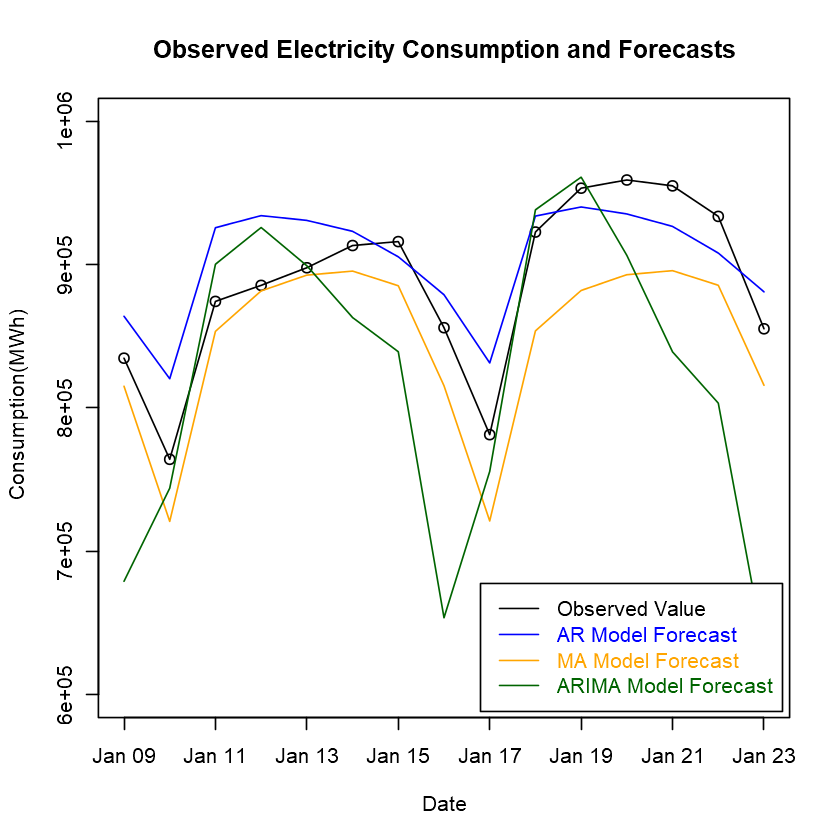

In [9]:
plot(x = forecastPeriod$Date, y=forecastPeriod$ObservedConsumption, col="black", type="o", ylim=c(600000,1000000),
     main = "Observed Electricity Consumption and Forecasts", xlab="Date", ylab="Consumption(MWh)")
lines(x = forecastPeriod$Date,y=forecastPeriod$ResultAR, col="blue")
lines(x = forecastPeriod$Date,y=forecastPeriod$ResultMA, col="orange")
lines(x = forecastPeriod$Date,y=forecastPeriod$ResultARIMA, col="darkgreen")
legend("bottomright", col = c("black", "blue", "orange", "darkgreen"), text.col = c("black", "blue", "orange", "darkgreen")
       , legend = c("Observed Value", "AR Model Forecast", "MA Model Forecast", "ARIMA Model Forecast"),
       inset = c(0.01, 0.01), lty = c(1,1,1,1))

accu = function(actual, forecast){
    n = length(actual)
    error = actual - forecast
    mean = mean(actual)
    sd = sd(actual)
    FBias = sum(error)/sum(actual)
    MAPE = sum(abs(error/actual)) / n
    RMSE = sqrt(sum(error^2) / n)
    MAD = sum(abs(error)) / n
    WMAPE = MAD / mean
    l = data.frame(n, mean, sd, FBias, MAPE, RMSE, MAD, WMAPE)
    return(l)
}

accuracy = data.table(accu(forecastPeriod$ObservedConsumption, forecastPeriod$ResultAR))
rownames(accuracy) = "AR"
accuracy = rbind(accuracy, accu(forecastPeriod$ObservedConsumption, forecastPeriod$ResultMA))
accuracy = rbind(accuracy, accu(forecastPeriod$ObservedConsumption, forecastPeriod$ResultARIMA))
rownames(accuracy) = c("AR","MA","ARIMA")
accuracy



<br>
Below, I also provided the daily accuracies of the model. There some interesting facts. For example, moving average model underestimated every day. Autoregressive model overestimated at first then underestimated towards end. Although, ARIMA model's bias changes signs frequently it has the biggest overall bias and underestimated generally as we have seen above.
<br>
When it comes to mean absolute percentage error AR and MA models are pretty constant across days and ARIMA model is more jumpy, it has very low MAPE some days and relatively high MAPE some days. In the overall sense, AR and MA models performed better.
<br><br>

In [10]:
dailyAccuracy = data.table(Date=observed$Date)
dailyAccuracy[,AR_Daily_Bias:=0]
dailyAccuracy[,MA_Daily_Bias:=0]
dailyAccuracy[,ARIMA_Daily_Bias:=0]
dailyAccuracy[,AR_Daily_MAPE:=0]
dailyAccuracy[,MA_Daily_MAPE:=0]
dailyAccuracy[,ARIMA_Daily_MAPE:=0]

for(i in 1:15){
    dailyBiasAR = (forecastPeriod$ObservedConsumption[i] - forecastPeriod$ResultAR[i]) 
    dailyMAPEAR = abs(dailyBiasAR) / forecastPeriod$ObservedConsumption[i]
    dailyAccuracy[i,AR_Daily_Bias:=dailyBiasAR]
    dailyAccuracy[i,AR_Daily_MAPE:=dailyMAPEAR]
    
    dailyBiasMA = (forecastPeriod$ObservedConsumption[i] - forecastPeriod$ResultMA[i]) 
    dailyMAPEMA = abs(dailyBiasMA) / forecastPeriod$ObservedConsumption[i]
    dailyAccuracy[i,MA_Daily_Bias:=dailyBiasMA]
    dailyAccuracy[i,MA_Daily_MAPE:=dailyMAPEMA]
    
    dailyBiasARIMA = (forecastPeriod$ObservedConsumption[i] - forecastPeriod$ResultARIMA[i]) 
    dailyMAPEARIMA = abs(dailyBiasARIMA) / forecastPeriod$ObservedConsumption[i]
    dailyAccuracy[i,ARIMA_Daily_Bias:=dailyBiasARIMA]
    dailyAccuracy[i,ARIMA_Daily_MAPE:=dailyMAPEARIMA]
}

dailyAccuracy
dailyAccuracy

Date,AR_Daily_Bias,MA_Daily_Bias,ARIMA_Daily_Bias,AR_Daily_MAPE,MA_Daily_MAPE,ARIMA_Daily_MAPE
2021-01-09,-29229.528,19559.158,155672.683,0.03501559,0.023430947,0.186488517
2021-01-10,-56190.958,43335.581,20223.448,0.07352858,0.056706702,0.026463360
2021-01-11,-51411.276,20886.991,-25891.471,0.05879908,0.023888453,0.029612077
2021-01-12,-48646.369,3884.211,-40341.684,0.05493339,0.004386204,0.045555417
2021-01-13,-33027.597,5151.671,-1360.400,0.03678574,0.005737870,0.001515197
2021-01-14,-9914.174,17846.061,50229.811,0.01085479,0.019539228,0.054995425
2021-01-15,10610.119,30806.151,76837.752,0.01158197,0.033627896,0.083875845
2021-01-16,-22984.579,40508.540,202357.288,0.02685063,0.047322159,0.236394199
2021-01-17,-50032.585,60211.492,25675.769,0.06403015,0.077056804,0.032859054
2021-01-18,-11149.603,68971.722,-15476.244,0.01208303,0.074745896,0.016771884


# 5. Conclusion
<br>
In this homework, I have manipulated the Turkey's electric consumption data and manually rearranged the data in the necessary times. I have made efforts to make the data as stationary as possible. After that, I have built autoregressive, moving average and autoregressive integrated moving average models to the manipulated data and forecasted the 9 January 2021 and 23 January 2021 period with all three models and evaluated their performances. Considering the overall weighted mean absolute percentage errors, autoregressive model with parameter 1 came first in performance than moving average with parameter 1 came second, and surprisingly ARIMA model with parameters tweaked by the auto.ARIMA function came last. Overall, all three models performed well with relatively low WMAPE values.